User
- Total unique tweeters
- Are there any super tweeters? 
- Retweeters? 
- Retweeted users? Maybe not possible. 
- 14 vs 14Pro
- Is there overlap in the sets? 

Time
- Total tweets over time
- 24hour period comparsion tweets per hour of day


In [2]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import csv


In [3]:
#load data for #iPhone14

with open('../data/raw/iPhone14x10k_RAW.csv') as csv_file:
    df1 = pd.read_csv(csv_file)

df1.head()

,Unnamed: 0,User,DateTime,Tweet
0,0,bosesubash56,2022-09-14 14:17:04+00:00,@WS_MobileTrans #nothingchangedaftertransfer a...
1,1,you_swerve,2022-09-14 14:15:18+00:00,RT @insanetweet: iPhone 8 while upgrading to i...
2,2,MarkVenaTechGuy,2022-09-14 14:13:51+00:00,My #SmartTechCheck newsletter thoughts about t...
3,3,WinPhanKyle,2022-09-14 14:13:16+00:00,RT @saradietschy: #iPhone14 Unboxing time!! Go...
4,4,zaheenhafzer,2022-09-14 14:13:04+00:00,RT @zollotech: But first the cases…#iphone14\n...


In [4]:
#load data for #iPhone14Pro

with open('../data/raw/iPhone14Prox10k_RAW.csv') as csv_file:
    dfPro = pd.read_csv(csv_file)

dfPro.head()

,Unnamed: 0,User,DateTime,Tweet
0,0,1202tung,2022-09-14 14:48:27+00:00,RT @insanetweet: iPhone 8 while upgrading to i...
1,1,Rushike74038427,2022-09-14 14:48:05+00:00,I want this case @Mrwhosetheboss \n#iphone14pr...
2,2,papsobu,2022-09-14 14:47:40+00:00,RT @insanetweet: iPhone 8 while upgrading to i...
3,3,_kayrozenlang,2022-09-14 14:47:27+00:00,RT @btslabs_global: 🏆Win iPhone14 Pro\n\nWith ...
4,4,SarenDebnath,2022-09-14 14:46:41+00:00,RT @btslabs_global: 🏆Win iPhone14 Pro\n\nWith ...


In [5]:
#Total unique tweeters for #iPhone14
phone = '#iPhone14'
total_tweeters = df1['User'].count()
num_uni = df1['User'].nunique()

print(f'{round((num_uni / total_tweeters)*100)}% of the {phone} tweets were from unique users.')


85% of the #iPhone14 tweets were from unique users.


In [6]:
#Total unique tweeters for #iPhone14Pro
phone = '#iPhone14Pro'
total_tweeters_pro = dfPro['User'].count()
num_uni_pro = dfPro['User'].nunique()

print(f'{round((num_uni_pro / total_tweeters_pro)*100)}% of the {phone} tweets were from unique users.')

87% of the #iPhone14Pro tweets were from unique users.


In [7]:
#Are there any super tweeters? 
phone = '#iPhone14'

df1_user_tweet_count = df1.groupby('User').agg('count').sort_values('Tweet', ascending=False).reset_index()
df1_user_tweet_count['of_total'] = (df1_user_tweet_count['Tweet'] / 10000) * 100 
top_tweeter = df1_user_tweet_count['User'][0]
top_tweeter_percent = df1_user_tweet_count['of_total'][0]

print(f'\'{top_tweeter}\' had the most tweets with {top_tweeter_percent}% of all tweets about {phone}')

'Rokibul60100130' had the most tweets with 1.6% of all tweets about #iPhone14


In [8]:
phone = '#iPhone14Pro'

dfPro_user_tweet_count = dfPro.groupby('User').agg('count').sort_values('Tweet', ascending=False).reset_index()
dfPro_user_tweet_count['of_total'] = (dfPro_user_tweet_count['Tweet'] / 10000) * 100 
top_tweeter = dfPro_user_tweet_count['User'][0]
top_tweeter_percent = dfPro_user_tweet_count['of_total'][0]

print(f'\'{top_tweeter}\' had the most tweets with {top_tweeter_percent}% of all tweets about {phone}')

'thebbmafrica' had the most tweets with 0.63% of all tweets about #iPhone14Pro


<AxesSubplot:xlabel='User'>

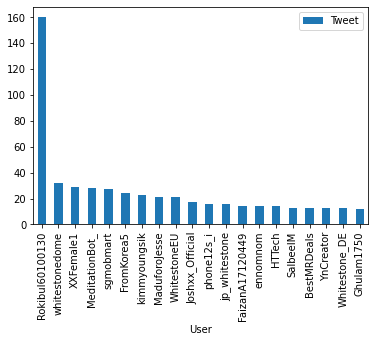

In [9]:
df1_bar = df1_user_tweet_count.drop(['Unnamed: 0', 'DateTime', 'of_total'], axis=1).head(20)
#dfPro_hist = dfPro_hist.set_index('User')
df1_bar.plot.bar(x='User', y='Tweet')

<AxesSubplot:xlabel='User'>

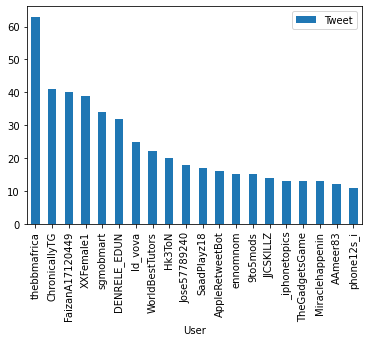

In [10]:
dfPro_bar = dfPro_user_tweet_count.drop(['Unnamed: 0', 'DateTime', 'of_total'], axis=1).head(20)
#dfPro_hist = dfPro_hist.set_index('User')
dfPro_bar.plot.bar(x='User', y='Tweet')


<AxesSubplot:xlabel='DateTime'>

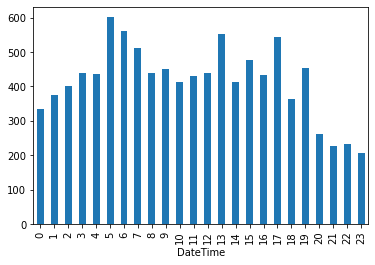

In [31]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1_per_hour = df1.groupby([df1['DateTime'].dt.hour]).agg('count')
df1_per_hour['Tweet'].plot.bar()

,Unnamed: 0,User,DateTime,Tweet
date+hour,,,,
2022-09-11 13:00:00+00:00,57,57,57,57
2022-09-11 14:00:00+00:00,111,111,111,111
2022-09-11 15:00:00+00:00,69,69,69,69
2022-09-11 16:00:00+00:00,106,106,106,106
2022-09-11 17:00:00+00:00,63,63,63,63
...,...,...,...,...
2022-09-14 10:00:00+00:00,90,90,90,90
2022-09-14 11:00:00+00:00,73,73,73,73
2022-09-14 12:00:00+00:00,104,104,104,104


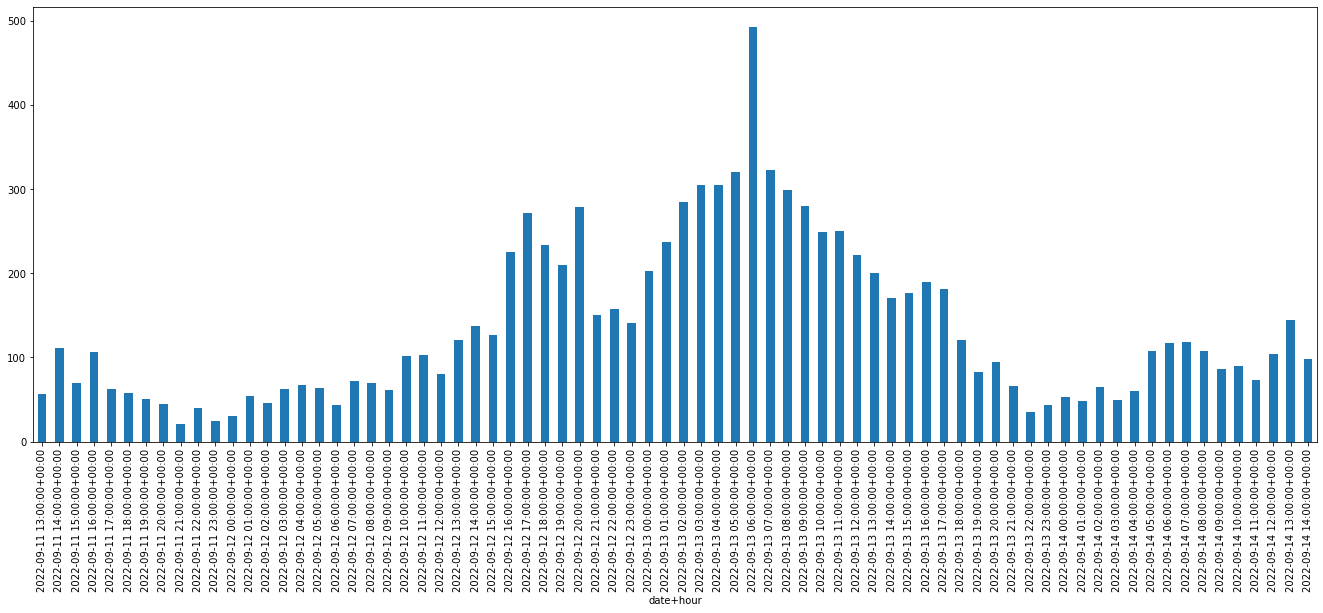

In [50]:
df1["date+hour"] = df1['DateTime'].dt.round('H')
df1_day_hour = df1.groupby(df1['date+hour']).agg('count')
df1_day_hour['Tweet'].plot(kind='bar', figsize=(23,8))
df1_day_hour

<AxesSubplot:xlabel='DateTime'>

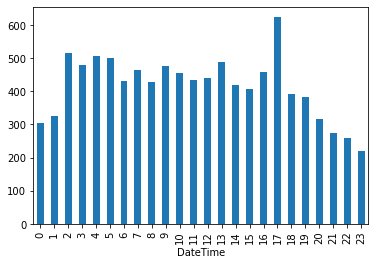

In [46]:
dfPro['DateTime'] = pd.to_datetime(dfPro['DateTime'])
dfPro_per_hour = dfPro.groupby([dfPro['DateTime'].dt.hour]).agg('count')
dfPro_per_hour['Tweet'].plot.bar()

<AxesSubplot:xlabel='date+hour'>

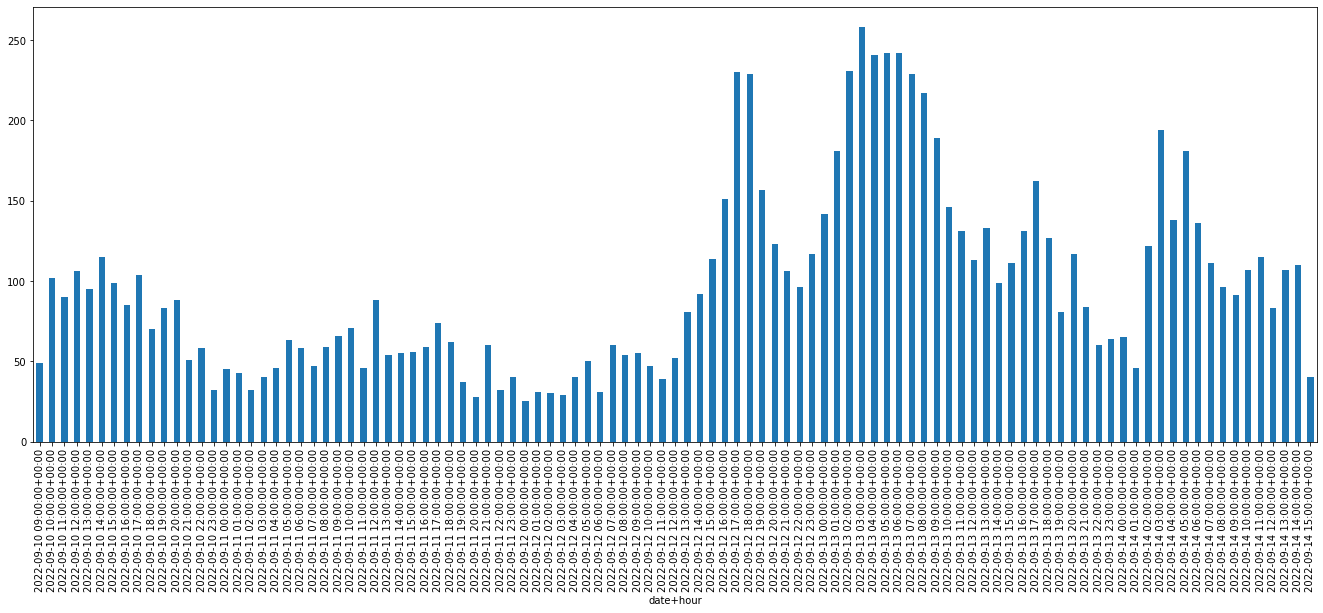

In [48]:
dfPro["date+hour"] = dfPro['DateTime'].dt.round('H')
dfPro_day_hour = dfPro.groupby(dfPro['date+hour']).agg('count')
dfPro_day_hour['Tweet'].plot(kind='bar', figsize=(23,8))
